In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
returns_multi = pd.read_csv('../Assignment/data/returns_multi_df.csv')
returns_multi = returns_multi.set_index(['stock','year'])
returns_multi

average_return
stock    year                
3MINDIA  2016        0.001560
         2017        0.000474
         2018        0.002309
         2019        0.001046
         2020       -0.000725
...                       ...
USHAMART 2018        0.000806
         2019        0.004201
         2020       -0.003194
         2021        0.003543
         2022        0.006334

[630 rows x 1 columns]

In [3]:
risks_multi = pd.read_csv('../Assignment/data/risks_multi_df.csv')
risks_multi = risks_multi.set_index(['stock','year'])
risks_multi

total_risk
stock    year            
3MINDIA  2016    0.024845
         2017    0.018672
         2018    0.020509
         2019    0.018940
         2020    0.023162
...                   ...
USHAMART 2018    0.035508
         2019    0.043226
         2020    0.035540
         2021    0.035950
         2022    0.036940

[630 rows x 1 columns]

In [4]:
financial_ratios = pd.read_csv('../Assignment/data/financial_ratios_df.csv')
financial_ratios = financial_ratios.set_index(['stock','year'])
financial_ratios

ratio_cfo_ebitda  ratio_debt_equity
stock    year                                     
3MINDIA  2016          0.736428           0.011283
         2017          0.872528           0.007976
         2018          0.064635           0.009445
         2019          0.418120           0.009628
         2020          0.494484           0.024061
...                         ...                ...
USHAMART 2018               NaN                NaN
         2019               NaN                NaN
         2020          0.276524           0.490176
         2021          0.693561           0.376541
         2022          0.352307           0.242379

[541 rows x 2 columns]

In [5]:
financial_growths = pd.read_csv('../Assignment/data/financial_growths_df.csv')
financial_growths = financial_growths.set_index(['stock','year'])
financial_growths

EBITDA_growth  CFO_growth
stock    year                           
3MINDIA  2017       0.180535    0.398712
         2018       0.338932   -0.900814
         2019       0.080450         NaN
         2020      -0.180953   -0.031366
         2021      -0.426464    0.310260
...                      ...         ...
USHAMART 2018            NaN    0.332361
         2019            NaN    0.066374
         2020            NaN   -0.782001
         2021      -0.598896    0.006026
         2022       0.460762   -0.257978

[415 rows x 2 columns]

-----
## Generating combinations of variables for Correlation test

In [6]:
combi1 = pd.merge(returns_multi, risks_multi, on=returns_multi.index.names, how='inner')
combi1.head()

average_return  total_risk
stock   year                            
3MINDIA 2016        0.001560    0.024845
        2017        0.000474    0.018672
        2018        0.002309    0.020509
        2019        0.001046    0.018940
        2020       -0.000725    0.023162

In [7]:
combi2 = pd.merge(returns_multi, financial_ratios.iloc[:,[0]], on=returns_multi.index.names, how='inner')
combi2.head()

average_return  ratio_cfo_ebitda
stock   year                                  
3MINDIA 2016        0.001560          0.736428
        2017        0.000474          0.872528
        2018        0.002309          0.064635
        2019        0.001046          0.418120
        2020       -0.000725          0.494484

In [8]:
combi3 = pd.merge(returns_multi, financial_ratios.iloc[:,[1]], on=returns_multi.index.names, how='inner')
combi3.head()

average_return  ratio_debt_equity
stock   year                                   
3MINDIA 2016        0.001560           0.011283
        2017        0.000474           0.007976
        2018        0.002309           0.009445
        2019        0.001046           0.009628
        2020       -0.000725           0.024061

In [9]:
combi4 = pd.merge(risks_multi, financial_ratios.iloc[:,[0]], on=risks_multi.index.names, how='inner')
combi4.head()

total_risk  ratio_cfo_ebitda
stock   year                              
3MINDIA 2016    0.024845          0.736428
        2017    0.018672          0.872528
        2018    0.020509          0.064635
        2019    0.018940          0.418120
        2020    0.023162          0.494484

In [10]:
combi5 = pd.merge(risks_multi, financial_ratios.iloc[:,[1]], on=risks_multi.index.names, how='inner')
combi5.head()

total_risk  ratio_debt_equity
stock   year                               
3MINDIA 2016    0.024845           0.011283
        2017    0.018672           0.007976
        2018    0.020509           0.009445
        2019    0.018940           0.009628
        2020    0.023162           0.024061

In [11]:
combi6 = pd.merge(returns_multi, financial_growths.iloc[:,[0]], on=returns_multi.index.names, how='inner')
combi6.head()

average_return  EBITDA_growth
stock   year                               
3MINDIA 2017        0.000474       0.180535
        2018        0.002309       0.338932
        2019        0.001046       0.080450
        2020       -0.000725      -0.180953
        2021        0.002127      -0.426464

In [12]:
combi7 = pd.merge(returns_multi, financial_growths.iloc[:,[1]], on=returns_multi.index.names, how='inner')
combi7.head()

average_return  CFO_growth
stock   year                            
3MINDIA 2017        0.000474    0.398712
        2018        0.002309   -0.900814
        2019        0.001046         NaN
        2020       -0.000725   -0.031366
        2021        0.002127    0.310260

In [13]:
combi8 = pd.merge(risks_multi, financial_growths.iloc[:,[0]], on=risks_multi.index.names, how='inner')
combi8.head()

total_risk  EBITDA_growth
stock   year                           
3MINDIA 2017    0.018672       0.180535
        2018    0.020509       0.338932
        2019    0.018940       0.080450
        2020    0.023162      -0.180953
        2021    0.019964      -0.426464

In [14]:
combi9 = pd.merge(risks_multi, financial_growths.iloc[:,[1]], on=risks_multi.index.names, how='inner')
combi9.head()

total_risk  CFO_growth
stock   year                        
3MINDIA 2017    0.018672    0.398712
        2018    0.020509   -0.900814
        2019    0.018940         NaN
        2020    0.023162   -0.031366
        2021    0.019964    0.310260

-----
## Conducting a test on the significance of the relationships between variables by testing the *significance of the correlations (using a t-test)*

#### t-Statistic for Correlation:
> #### $$tStat_{\rho _{x,y}} = \frac{\rho_{x,y}\sqrt{n-2}}{\sqrt{1-\rho_{x,y}^{2}}}$$
>  where:  
>  $tStat$ = *t-Statistic*  
>  $\rho_{x,y}$ = *Correlation coefficient* (Sample correlation)  
>  $n$ = *Sample size*

In [15]:
# Defining a function for conducting t-test for Correlation
def t_stat_corr(df):
    corr_xy = df.corr().iloc[0][1]
    n = len(df)
    
    # t-statisitc for Correlation:
    t_stat = ((corr_xy * np.sqrt(n-2)) / np.sqrt(1 - (corr_xy ** 2)))
    
    if t_stat >= 1.96 or t_stat <= -1.96:
        test_result = 'SIGNIFICANT.'
    else:
        test_result = 'INSIGNIFICANT.'
    
    print('t-test result for correlation between {} and {} is :'.format(df.columns[0],df.columns[1]), t_stat)
    print('Correlation is', test_result)
    
    sns.regplot(x=df.iloc[:,[1]], y=df.iloc[:,[0]])

t-test result for correlation between average_return and total_risk is : 4.144679966018635
Correlation is SIGNIFICANT.


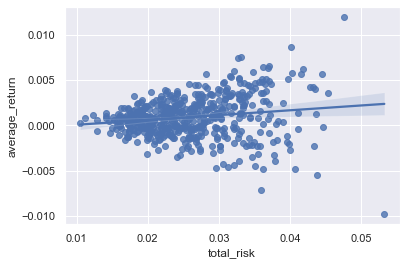

In [16]:
t_stat_corr(combi1)

t-test result for correlation between average_return and ratio_cfo_ebitda is : -0.9761145886725878
Correlation is INSIGNIFICANT.


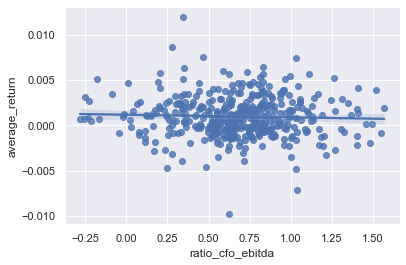

In [17]:
t_stat_corr(combi2)

t-test result for correlation between average_return and ratio_debt_equity is : -2.4676447744480354
Correlation is SIGNIFICANT.


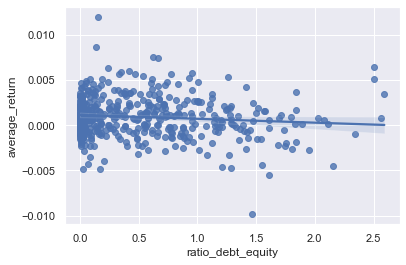

In [18]:
t_stat_corr(combi3)

t-test result for correlation between total_risk and ratio_cfo_ebitda is : 0.7669397840588222
Correlation is INSIGNIFICANT.


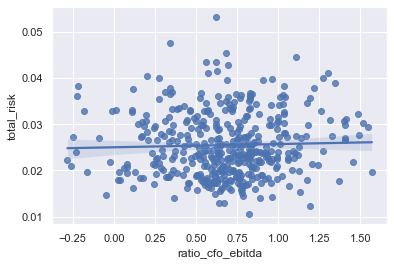

In [19]:
t_stat_corr(combi4)

t-test result for correlation between total_risk and ratio_debt_equity is : 4.052961159352565
Correlation is SIGNIFICANT.


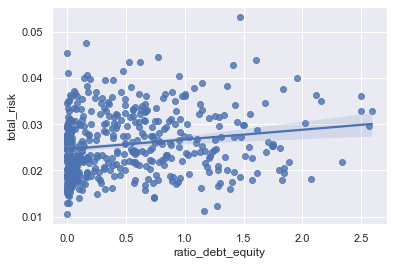

In [20]:
t_stat_corr(combi5)

t-test result for correlation between average_return and EBITDA_growth is : 5.473021817756694
Correlation is SIGNIFICANT.


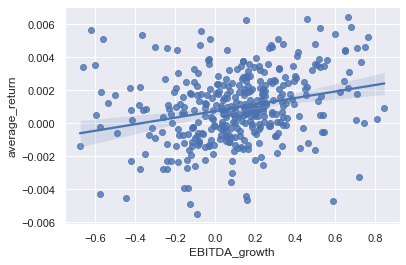

In [21]:
t_stat_corr(combi6)

t-test result for correlation between average_return and CFO_growth is : 2.1708311662732567
Correlation is SIGNIFICANT.


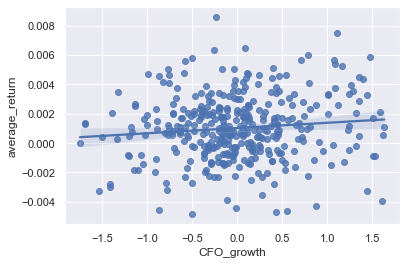

In [22]:
t_stat_corr(combi7)

t-test result for correlation between total_risk and EBITDA_growth is : -0.6402173767225123
Correlation is INSIGNIFICANT.


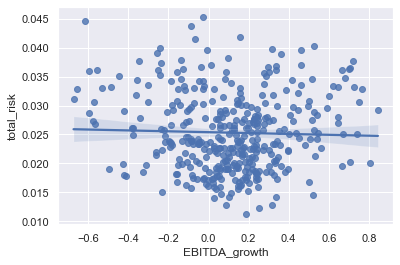

In [23]:
t_stat_corr(combi8)

t-test result for correlation between total_risk and CFO_growth is : 0.4792120272385252
Correlation is INSIGNIFICANT.


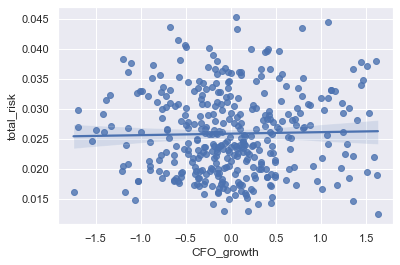

In [24]:
t_stat_corr(combi9)

**Without considering the variation in time**, as observed in the above *simple linear regression plot* graphs:  
1. For *average annual return of a stock*, we found statistically significant correlation between the average_return & ratio_debt_equity, average_return & EBITDA_growth, and average_return & CFO_growth.
2. For *volatility (risk) of a stock in a year*, we found only one statistically significant correlation i.e. the correlation between the total_risk & ratio_debt_equity.
3. Relationship between *average return* and *total risk* of stocks is significant.
4. The relationships that turned out to be *INSIGNIFICANT* are:
* average_return and ratio_cfo_ebitda,
* total_risk and ratio_cfo_ebitda,
* total_risk and EBITDA_growth, and
* total_risk and CFO_growth
  
But, considering EBITDA growth instead of CFO growth would be better for the regression model to avoid '*multicollinearity*', because Cash Flow from Operations or CFO is "EBITDA adjusted for 'Non-Cash expenses & incomes', 'Income Tax paid' and 'Changes in Working-Capital'", whereas EBITDA is not adjusted for these. The correlation t-tests also reflected the strength of correlation between average return & EBITDA growth to be stronger than the correlation between average return & CFO growth (**5.473 vs. 2.171**). 

The data is of a structure of a *panel data* since the data consists of several companies (individuals/cross-sectional) observed at points in time (time-series). Therefore, for conducting Analysis of Variance (ANOVA), 2 Panel dataframes will be created:
* `anova_data1` having columns 'average_return', 'EBITDA_growth', and 'ratio_debt_equity' would be generated, and
* `anova_data2` having columns 'total_risk' and 'ratio_debt_equity'.

----
## Developing functions for Panel Data regression models and conducting ANOVA on the data using these models

In [25]:
# Importing libraries
from linearmodels import PooledOLS
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from linearmodels import PanelOLS
from linearmodels import RandomEffects
import numpy.linalg as la
from scipy import stats

* *Pooled Regression* test or *Pooled OLS* test is a standard ordinary least squares (OLS) regression conducted without any cross-sectional or time-effects. The model assumes no correlation between unobserved independent variable(s) and the independent variables from the regression (i.e. exogeneity).

In [26]:
# Developing a function for conducting Pooled OLS test, Heteroskedasticity and Serial Correlation tests
def Pooled_OLS_test(df):
    inde_var = df.iloc[:,1:]
    inde_var = sm.tools.tools.add_constant(inde_var)
    dep_var = df.iloc[:,[0]]
    
    model = PooledOLS(dep_var, inde_var)
    
    OLSresult = model.fit()    
    print(OLSresult)
    print('\n')
        
    fittedvalues = OLSresult.predict().fitted_values
    residualvalues = OLSresult.resids
    
    # Plotting the fitted values and residual values of PooledOLS test
    fig, ax = plt.subplots(figsize=(10,6))
    ax.scatter(fittedvalues, residualvalues)
    ax.axhline(0, color = 'r', ls = '--')
    ax.set_xlabel('Predicted Values', fontsize = 15)
    ax.set_ylabel('Residuals', fontsize = 15)
    ax.set_title('Homoskedasticity Test', fontsize = 25)
    plt.show()
    print('\n')
    
    # Running 'White test for Heteroskedasticity' of residual/errors
    pooled_OLS_dataset = pd.concat([df, residualvalues], axis=1)
    pooled_OLS_dataset = pooled_OLS_dataset.droplevel(level=1).fillna(0) # for removing the year column
    exog = sm.tools.tools.add_constant(df.iloc[:,1:]).fillna(0)
    white_test_results = het_white(pooled_OLS_dataset['residual'], exog)
    labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val']
    print('White test for Heteroskedasticity:\n',dict(zip(labels, white_test_results)))
    print('\n')
    
    # Running Breusch-Pagan test for Heteroskedasticity of residual/errors
    breusch_pagan_test_results = het_breuschpagan(pooled_OLS_dataset['residual'], exog)
    print('Breusch-Pagan test for Heteroskedasticity:\n',dict(zip(labels, breusch_pagan_test_results)))
    print('\n')
    
    # Running Durbin-Watson test for Serial Correlation
    durbin_watson_test_results = durbin_watson(pooled_OLS_dataset['residual'])
    print('Durbin-Watson (DW) statistic for Autocorrelation is {}.'.format(durbin_watson_test_results))

* The Fixed-effects (FE) model determines individual effects of unobserved independent variables as constant (“fix“) over time. Within FE-models, the relationship between unobserved independent variables and the independent variables from the regression (i.e. endogeneity) can be existent.  
and  
* Random effects (RE) models determine individual effects of unobserved independent variables as random variables over time. They are able to “switch” between OLS and FE and hence, can focus on both, dependencies between and within individuals.

In [27]:
# Developing a function for conducting Fixed Effects and Random Effects Panel data regression tests
def fixed_random_tests(df):
    inde_var = sm.tools.tools.add_constant(df.iloc[:,1:])
    dep_var = df.iloc[:,[0]]
    
    # random effects model
    model_re = RandomEffects(dep_var, inde_var) 
    re_res = model_re.fit()
       
    # fixed effects model
    model_fe = PanelOLS(dep_var, inde_var, entity_effects = True) 
    fe_res = model_fe.fit()
      
    #print results
    print('\n=====================================================================================')
    print('Random Effects regression:\n', re_res,'\n=====================================================================================')
    print('\n=====================================================================================')
    print('Fixed Effects regression:\n',fe_res)
    
    # Conducting a Durbin-Wu-Hausman test for choosing the best estimator
    # between the Fixed Effects model and Random Effects model
    b = fe_res.params
    B = re_res.params
    v_b = fe_res.cov
    v_B = re_res.cov
    dof = b.size
    chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B))
    pval = stats.chi2.sf(chi2, dof)
    
    print('\n=====================================================================================')
    print('Durbin-Wu-Hausman test for Panel Data:\n')
    print('chi-Squared: ' + str(chi2))
    print('degrees of freedom: ' + str(dof))
    print('p-Value: ' + str(pval))
    if pval <= 0.05:
        print('\nFixed Effects model would be the appropriate model for the analysis because')
        print('the p-value of the Hausman test is {}, which is less than or equal to 0.05.'.format(round(pval,5)))        
    else:
        print('\nBoth the Random Effects model and Fixed Effects model would be consistent models for the analysis because')
        print('the p-value of the Hausman test is {}, which is greater than 0.05. Since the standard error of the'.format(round(pval,5)))
        print('coefficient terms of Random Effects model would be more efficient than that of the Fixed Effects model, i.e.')
        print('the Random Effects model results in relatively lower Standard Errors of the coefficient terms,')
        print('\nthe Random EFfects model would be the appropriate model for the analysis.')

-----
## ANOVA results for `anova_data1`

In [28]:
# Since, 'combi6' dataframe already contained 'average_return' and 'EBITDA_growth'
# We would combine combi6 with 'ratio_debt_equity' from 'financial_ratios' dataframe

anova_data1 = pd.merge(combi6, financial_ratios['ratio_debt_equity'], on=combi6.index.names, how='inner')
anova_data1 = anova_data1.dropna()
anova_data1

average_return  EBITDA_growth  ratio_debt_equity
stock    year                                                  
3MINDIA  2017        0.000474       0.180535           0.007976
         2018        0.002309       0.338932           0.009445
         2019        0.001046       0.080450           0.009628
         2020       -0.000725      -0.180953           0.024061
         2021        0.002127      -0.426464           0.012106
...                       ...            ...                ...
UNOMINDA 2020       -0.000905      -0.098882           0.612728
         2021        0.003759       0.141510           0.452291
         2022        0.002569       0.225628           0.250691
USHAMART 2021        0.003543      -0.598896           0.376541
         2022        0.006334       0.460762           0.242379

[342 rows x 3 columns]

                          PooledOLS Estimation Summary                          
Dep. Variable:         average_return   R-squared:                        0.0827
Estimator:                  PooledOLS   R-squared (Between):             -0.0154
No. Observations:                 342   R-squared (Within):               0.0911
Date:                Wed, Jan 25 2023   R-squared (Overall):              0.0827
Time:                        13:04:27   Log-likelihood                    1639.7
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      15.273
Entities:                          82   P-value                           0.0000
Avg Obs:                       4.1707   Distribution:                   F(2,339)
Min Obs:                       0.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             15.273
                            

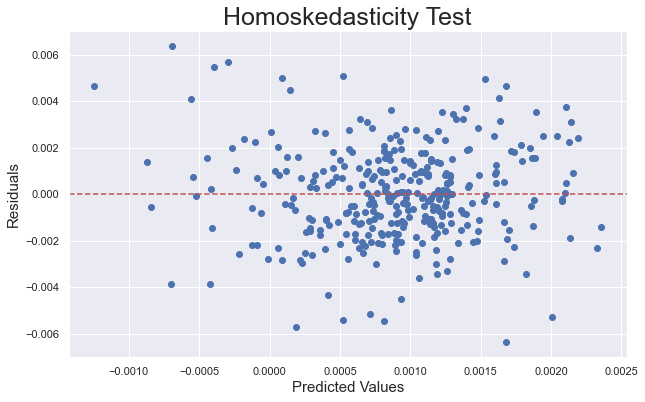



White test for Heteroskedasticity:
 {'LM-Stat': 48.016697121762185, 'LM p-val': 3.524155728949736e-09, 'F-Stat': 10.975868408141746, 'F p-val': 8.421787603346033e-10}


Breusch-Pagan test for Heteroskedasticity:
 {'LM-Stat': 18.382894932599275, 'LM p-val': 0.00010190725058926592, 'F-Stat': 9.628355987013173, 'F p-val': 8.568581762733723e-05}


Durbin-Watson (DW) statistic for Autocorrelation is 2.177224045295696.


In [29]:
Pooled_OLS_test(anova_data1)

+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
* ### Observations from the Pooled OLS regression model:

> The *PooledOLS* results show that **the causal relationship between 'average_return' and 'EBITDA_growth' is statistically significant** with the p-value of 'EBITDA_growth' being significantly less than 0.05. But, the p-value of 'ratio_debt_equity' is greater than 0.05 (p-value = 0.1930) i.e. **the relationship between 'ratio_debt_equity' and 'average_return' is statistically insignificant**.

> The above Heteroskedasticity test results show that **the residuals of the test are *Heteroskedastic*** (i.e. the variance of the residual terms in the regression model varies widely) since p-value of F-statistic for both the White test and the Breusch-Pagan test are significantly less than 0.05.

> The Durbin-Watson (DW) statistic of 2.1772 lies in the range of 1.5-2.5 which as a rule of thumb is considered normal. This indicates that the **possibility of serial correlation in the residuals** of the regression model **is low**.

> Even though the *PooledOLS* model depicted the causal relationship between 'average_return' and 'EBITDA_growth' to be significant, the residuals of this model are *heteroskedastic*. Therefore, **the OLS estimator is not the Best Linear Unbiased Estimator (BLUE) here**.

+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
* ### Conclusion:

To test the relationship between the variables, we move on to the *Fixed Effects* model OR the *Random Effects* model.

+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+

In [30]:
fixed_random_tests(anova_data1)


Random Effects regression:
                         RandomEffects Estimation Summary                        
Dep. Variable:         average_return   R-squared:                        0.0827
Estimator:              RandomEffects   R-squared (Between):             -0.0154
No. Observations:                 342   R-squared (Within):               0.0911
Date:                Wed, Jan 25 2023   R-squared (Overall):              0.0827
Time:                        13:04:28   Log-likelihood                    1639.7
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      15.273
Entities:                          82   P-value                           0.0000
Avg Obs:                       4.1707   Distribution:                   F(2,339)
Min Obs:                       0.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             15.273

+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
* ### Observations from the Random Effects regression model:

> Like the earlier *PooledOLS* results, the ***Random Effects* model exhibits a strong causal relationship between 'average_return' and 'EBITDA_growth'** with the p-value of 'EBITDA_growth' being significantly less than 0.05. But, **the relationship between variable 'ratio_debt_equity' and variable 'average_return' is statistically insignificant**, since the p-value of 'ratio_debt_equity' is 0.1930, which is greater than p-value of 0.05.

+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
* ### Conclusion:

There exists a strong relationship between the *annual average return of stocks* and the *rate of growth in EBITDA of companies*. Although, the Debt-to-Equity ratio of a company does not have a significant impact on the annual average returns of stocks.

+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+

-----
## ANOVA results for `anova_data2`

In [31]:
# Since 'combi5' dataframe already contained 'total_risk' and 'ratio_debt_equity'
# We will just copy 'combi5' to 'anova_data2' dataframe

anova_data2 = combi5.copy()
anova_data2 = anova_data2.dropna()
anova_data2

total_risk  ratio_debt_equity
stock    year                               
3MINDIA  2016    0.024845           0.011283
         2017    0.018672           0.007976
         2018    0.020509           0.009445
         2019    0.018940           0.009628
         2020    0.023162           0.024061
...                   ...                ...
UNOMINDA 2021    0.030972           0.452291
         2022    0.027606           0.250691
USHAMART 2020    0.035540           0.490176
         2021    0.035950           0.376541
         2022    0.036940           0.242379

[465 rows x 2 columns]

                          PooledOLS Estimation Summary                          
Dep. Variable:             total_risk   R-squared:                        0.0296
Estimator:                  PooledOLS   R-squared (Between):              0.0789
No. Observations:                 465   R-squared (Within):              -0.0253
Date:                Wed, Jan 25 2023   R-squared (Overall):              0.0296
Time:                        13:04:28   Log-likelihood                    1662.7
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      14.110
Entities:                          90   P-value                           0.0002
Avg Obs:                       5.1667   Distribution:                   F(1,463)
Min Obs:                       0.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             14.110
                            

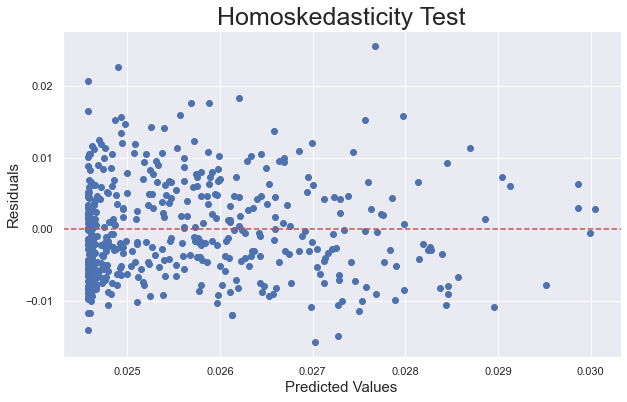



White test for Heteroskedasticity:
 {'LM-Stat': 3.229987941368975, 'LM p-val': 0.19889186961903932, 'F-Stat': 1.615798330276801, 'F p-val': 0.19985294587081157}


Breusch-Pagan test for Heteroskedasticity:
 {'LM-Stat': 2.4189639786455324, 'LM p-val': 0.1198741867177405, 'F-Stat': 2.4211548569863623, 'F p-val': 0.12038990289703803}


Durbin-Watson (DW) statistic for Autocorrelation is 0.969805802650738.


In [32]:
Pooled_OLS_test(anova_data2)

+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
* ### Observations from the Pooled OLS regression model:

>**There exists a causal relationship between 'ratio_debt_equity' and 'total_risk'**, as illustrated by the *PooledOLS* results. The variable 'ratio_debt_equity' has a p-value of 0.002, which is less than the **α** of 0.05.

> Both the White test and Breusch-Pagan test results show that **the residual terms of the Pooled OLS model are *Homoskedastic*** i.e. the variance of the residual terms is constant, since the p-value of F-statistic for both the White test (0.19985) and the Breusch-Pagan test (0.12039) are greater than 0.05.

> **The residuals of the model are positively correlated**, as illustrated by the Durbin-Watson (DW) statistic of 0.96981, which is below the range of 1.5-2.5 where there is no autocorrelation.

> The causal relationship between 'ratio_debt_equity' and 'total_risk' is significant as per the *PooledOLS* model, but the residuals are serially correlated, which results in **the OLS estimator not being the Best Linear Unbiased Estimator (BLUE) here**.

+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
* ### Conclusion:
To test the relationship between volatility (total_risk) of the stocks and the Debt-to-Equity ratio (ratio_debt_equity) of the companies, the Fixed Effects model or the Random Effects model need to be be used.

+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+

In [33]:
fixed_random_tests(anova_data2)


Random Effects regression:
                         RandomEffects Estimation Summary                        
Dep. Variable:             total_risk   R-squared:                        0.1234
Estimator:              RandomEffects   R-squared (Between):              0.0415
No. Observations:                 465   R-squared (Within):              -0.0059
Date:                Wed, Jan 25 2023   R-squared (Overall):              0.0172
Time:                        13:04:29   Log-likelihood                    1795.5
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      65.163
Entities:                          90   P-value                           0.0000
Avg Obs:                       5.1667   Distribution:                   F(1,463)
Min Obs:                       0.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             1.3834

+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
* ### Observations from the Fixed Effects regression model:

> As per the *Fixed EFfects* model, **the independent variable 'ratio_debt_equity' is not significantly related to the dependent variable 'total_risk'** as the p-value (0.4371) is much greater than 0.05. **This is in contrast to the *PooledOLS* model**, where it showed a significant relationship between 'total_risk' and 'ratio_debt_equity'. But the *PooledOLS* results had to be rejected as it was not the Best Linear Unbiased Estimator (BLUE).

> The Hausman test considered Fixed Effects model to be the appropriate model for 'anova_data2', this also confirms the existence of Endogeneity in the model. Therefore, to model the endogeneity, regression models like the 2SLS (2 Stage Least Squares) in which instrument variables help to deal with endogeneity, are required which is beyond the scope of this analysis.

+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
* ### Conclusion:

There exists no relationship between the volatility (risk) of stocks and the Debt-to-Equity ratio of companies.

+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+

-------
## Final Conclusion:
#### The only significant relationship found out of the ANOVA results is the causal relationship between `average_return` and `EBITDA_growth` from the *'anova_data1'* dataframe. These variables would be taken over to the Part 4 of the analysis, where we will be using the Long-Short strategy to gain Excess Return from the stocks.

In [34]:
# Transfering the analysis data to .csv file for Part 4
# The relevant columns can be found in 'combi6' dataframe without the removal of rows in 'anova_data1' dataframe

analysis_data = combi6.copy()
analysis_data.to_csv('../Assignment/data/analysis_data_df.csv')
analysis_data

average_return  EBITDA_growth
stock    year                               
3MINDIA  2017        0.000474       0.180535
         2018        0.002309       0.338932
         2019        0.001046       0.080450
         2020       -0.000725      -0.180953
         2021        0.002127      -0.426464
...                       ...            ...
USHAMART 2018        0.000806            NaN
         2019        0.004201            NaN
         2020       -0.003194            NaN
         2021        0.003543      -0.598896
         2022        0.006334       0.460762

[415 rows x 2 columns]

### Continued in Part 4...

-------
## References:
* ***Data-Driven Investing with Python | Financial Data Science*** - by Fervent #LearnWithDistinction  
(https://www.udemy.com/course/data-driven-investing-with-python-financial-data-science/)
* ***A Guide to Panel Data Regression: Theoretics and Implementation with Python.*** - by Benhard Brugger  
(https://towardsdatascience.com/a-guide-to-panel-data-regression-theoretics-and-implementation-with-python-4c84c5055cf8)
* ***Hausman test for Random Effects vs Fixed EFfects*** - by Ben Lambert  
(https://www.youtube.com/watch?v=54o4-bN9By4)